<a href="https://colab.research.google.com/github/snemmani/ai-security/blob/main/adversaria/evasion/Evasion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fast Gradient Sign Method

## The Concept: Training vs. Attacking
In a normal training loop, we freeze the input data and update the model weights to minimize the loss (error).
In an evasion attack (like FGSM), we flip the script:We freeze the model weights.We update the input data to maximize the loss.

We want to find a tiny perturbation (let's call it $\delta$) that we can add to an image $x$, such that the human eye sees the same image, but the model sees something completely different.The Math: Fast Gradient Sign Method (FGSM)The most common "first attack" to learn is the Fast Gradient Sign Method (FGSM).

It uses the gradients of the neural network to create an adversarial example.The formula looks like this:

$$x_{adv} = x + \epsilon \cdot \text{sign}(\nabla_x J(\theta, x, y))$$

TensorFlow with MNIST is the classic "Hello World" of adversarial ML. It's lightweight, so we can iterate quickly.

## The Victim Model 🎯

In [1]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"Shape of training images: {x_train.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of test images: {x_test.shape}")
print(f"Shape of test labels: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of training images: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of test images: (10000, 28, 28)
Shape of test labels: (10000,)


### Task
Build, compile, train, and evaluate a Deep Neural Network (DNN) model for image classification using the MNIST dataset, then present the accuracy, precision, and recall metrics.

### Preprocess Data

#### Subtask:
Normalize and reshape the `x_train` and `x_test` images from 28x28 to 784-dimensional vectors, and convert labels `y_train` and `y_test` to one-hot encoded format.


In [2]:
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

x_train_reshaped = x_train_normalized.reshape((60000, 784))
x_test_reshaped = x_test_normalized.reshape((10000, 784))

y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=10)

print(f"Shape of normalized and reshaped training images: {x_train_reshaped.shape}")
print(f"Shape of normalized and reshaped test images: {x_test_reshaped.shape}")
print(f"Shape of one-hot encoded training labels: {y_train_one_hot.shape}")
print(f"Shape of one-hot encoded test labels: {y_test_one_hot.shape}")

Shape of normalized and reshaped training images: (60000, 784)
Shape of normalized and reshaped test images: (10000, 784)
Shape of one-hot encoded training labels: (60000, 10)
Shape of one-hot encoded test labels: (10000, 10)


### Build DNN Model

#### Subtask:
Construct a Deep Neural Network (DNN) using TensorFlow/Keras with appropriate Dense layers for image classification.


**Reasoning**:
The subtask is to construct a Deep Neural Network (DNN) model using TensorFlow/Keras following the provided instructions for layer configuration and activation functions, and then display its summary. All these operations can be performed in a single code block.



In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Initialize a Sequential model
model = Sequential()

# Add an Input layer to explicitly define the input shape
model.add(Input(shape=(784,)))

# Add the first Dense layer
model.add(Dense(256, activation='relu'))

# Add a second Dense hidden layer
model.add(Dense(128, activation='relu'))

# Add the output Dense layer
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

### Compile Model

#### Subtask:
Compile the DNN model, specifying an optimizer (e.g., Adam), a loss function (e.g., 'categorical_crossentropy'), and metrics including 'accuracy', 'Precision', and 'Recall'.


**Reasoning**:
The subtask requires compiling the DNN model with a specified optimizer, loss function, and metrics. This can be achieved using the `compile` method on the `model` object in a single code block.



In [35]:
import tensorflow as tf

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

print("Model compiled successfully with Adam optimizer, categorical_crossentropy loss, and accuracy, Precision, Recall metrics.")

Model compiled successfully with Adam optimizer, categorical_crossentropy loss, and accuracy, Precision, Recall metrics.


### Train Model

#### Subtask:
Train the compiled DNN model using the preprocessed `x_train` and `y_train` data for a specified number of epochs.


**Reasoning**:
The subtask is to train the compiled DNN model. This involves using the `.fit()` method with the preprocessed training data, specifying epochs, batch size, and a validation split, and storing the training history.



In [36]:
history = model.fit(
    x_train_reshaped,
    y_train_one_hot,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

print("Model training complete.")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8878 - loss: 0.3922 - precision_1: 0.9370 - recall_1: 0.8294 - val_accuracy: 0.9658 - val_loss: 0.1105 - val_precision_1: 0.9707 - val_recall_1: 0.9612
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9706 - loss: 0.0947 - precision_1: 0.9750 - recall_1: 0.9661 - val_accuracy: 0.9688 - val_loss: 0.1020 - val_precision_1: 0.9722 - val_recall_1: 0.9657
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9821 - loss: 0.0593 - precision_1: 0.9846 - recall_1: 0.9798 - val_accuracy: 0.9743 - val_loss: 0.0911 - val_precision_1: 0.9772 - val_recall_1: 0.9722
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9856 - loss: 0.0458 - precision_1: 0.9869 - recall_1: 0.9842 - val_accuracy: 0.9714 - val_loss: 0.1049 - val_precision_1: 0.9739 - val_recall_1: 0.9700
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9891 - loss: 0.0329 - precision_1: 0.9898 - reca

Create a Gradient tape to watch the gradients to see where there is loss in the model weights while predicting the image. Based on the tiny perturbations in the image values, it identifies the loss and its direction.


In [93]:
def create_adversarial_pattern(input_image, input_label, model):
  input_image_tensor = tf.convert_to_tensor(input_image)
  # Add a batch dimension to the input image (from (784,) to (1, 784))
  input_image_tensor = tf.expand_dims(input_image_tensor, axis=0)

  # Add a batch dimension to the input label (from (10,) to (1, 10)) for loss calculation
  input_label_tensor = tf.convert_to_tensor(input_label)
  input_label_tensor = tf.expand_dims(input_label_tensor, axis=0)

  with tf.GradientTape() as tape:
    tape.watch(input_image_tensor)
    # Use direct model call instead of predict to ensure gradients are recorded
    prediction = model(input_image_tensor)
    # Use the batched label tensor for loss calculation
    loss = tf.keras.losses.categorical_crossentropy(input_label_tensor, prediction)
    gradient = tape.gradient(loss, input_image_tensor)
  signed_grad = tf.sign(gradient)
  # Remove the batch dimension before returning the gradient if only a single gradient is expected
  return tf.squeeze(signed_grad, axis=0)

In [94]:
create_adversarial_pattern(x_train_reshaped[0], y_train_one_hot[0], model)

<tf.Tensor: shape=(784,), dtype=float32, numpy=
array([-1.,  1.,  1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1.,
        1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,
       -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
        1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1.,
        1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,
        1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1., -1., -1., -1.,
       -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
       -1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,
        1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
        1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1.,
        1.,  1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1.,
        1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1.,
       -1., -1.,

In [95]:
def create_adversarial_image(input_image, input_label, model, epsilon=0.01):
  gradients = create_adversarial_pattern(input_image, input_label, model)
  adversarial_image = input_image + epsilon * gradients
  return adversarial_image

In [96]:
create_adversarial_image(x_train_reshaped[0], y_train_one_hot[0], model)

<tf.Tensor: shape=(784,), dtype=float32, numpy=
array([-0.01      ,  0.01      ,  0.01      , -0.01      , -0.01      ,
        0.01      , -0.01      , -0.01      ,  0.01      , -0.01      ,
       -0.01      , -0.01      , -0.01      ,  0.01      ,  0.01      ,
        0.01      , -0.01      , -0.01      ,  0.01      ,  0.01      ,
        0.01      , -0.01      , -0.01      ,  0.01      , -0.01      ,
       -0.01      , -0.01      , -0.01      ,  0.01      ,  0.01      ,
        0.01      , -0.01      ,  0.01      ,  0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      , -0.01      ,  0.01      ,
        0.01      ,  0.01      ,  0.01      ,  0.01      , -0.01      ,
       -0.01      , -0.01      , -0.01      , -0.01      ,  0.01      ,
        0.01      , -0.01      ,  0.01      , -0.01      , -0.01      ,
       -0.01      , -0.01      , -0.01      ,  0.01      ,  0.01      ,
        0.01      , -0.01      ,  0.01      , -0.01      , -0.01      ,
        0.01    

## Task
Evaluate the trained Deep Neural Network (DNN) model using the preprocessed `x_test_reshaped` and `y_test_one_hot` data to obtain and present the accuracy, precision, and recall metrics.

### Evaluate Model

#### Subtask:
Evaluate the trained model using the preprocessed `x_test` and `y_test` data to obtain the accuracy, precision, and recall.


**Reasoning**:
To evaluate the trained model, I will use the `model.evaluate()` method with the preprocessed test data (`x_test_reshaped` and `y_test_one_hot`) and store the results in `evaluation_results`.



In [97]:
evaluation_results = model.evaluate(x_test_reshaped, y_test_one_hot)

print("Model Evaluation Results:")
print(f"Loss: {evaluation_results[0]:.4f}")
print(f"Accuracy: {evaluation_results[1]:.4f}")
print(f"Precision: {evaluation_results[2]:.4f}")
print(f"Recall: {evaluation_results[3]:.4f}")

ValueError: You must call `compile()` before using the model.

### Select and process a sample image

#### Subtask:
Select a sample image from the dataset, reshape it to 28x28 for plotting, and get its original predicted label.


In [64]:
sample_index = 0
original_image = x_test_reshaped[sample_index]
original_label_one_hot = y_test_one_hot[sample_index]

# Reshape the image for plotting (28x28)
original_image_reshaped = original_image.reshape(28, 28)

# Predict the class of the original image
original_image_batch = tf.expand_dims(original_image, axis=0)
original_prediction = model.predict(original_image_batch)
original_predicted_label = tf.argmax(original_prediction, axis=1).numpy()[0]

print(f"Original image index: {sample_index}")
print(f"Original image shape (reshaped for plotting): {original_image_reshaped.shape}")
print(f"Original one-hot encoded label: {original_label_one_hot}")
print(f"Original predicted label: {original_predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Original image index: 0
Original image shape (reshaped for plotting): (28, 28)
Original one-hot encoded label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Original predicted label: 7


## Generate adversarial image




In [81]:
epsilon = 0.08
adversarial_image = create_adversarial_image(original_image, original_label_one_hot, model, epsilon=epsilon)

print(f"Adversarial image generated with epsilon: {epsilon}")

tf.Tensor(
[[3.85707796e-13 5.11925169e-09 7.55146168e-09 6.55963461e-09
  2.52213831e-13 9.99269352e-13 1.30210885e-14 1.00000000e+00
  3.12003513e-11 2.62210254e-10]], shape=(1, 10), dtype=float32)
Adversarial image generated with epsilon: 0.08


## Reshape adversarial image for plotting


In [82]:
adversarial_image_reshaped = adversarial_image.numpy().reshape(28, 28)
# Clip the values to be between 0 and 1
adversarial_image_reshaped = tf.clip_by_value(adversarial_image_reshaped, clip_value_min=0., clip_value_max=1.)

print(f"Shape of adversarial image reshaped for plotting: {adversarial_image_reshaped.shape}")

Shape of adversarial image reshaped for plotting: (28, 28)


In [83]:
adversarial_image_batch = tf.expand_dims(adversarial_image, axis=0)
adversarial_prediction = model.predict(adversarial_image_batch)
adversarial_predicted_label = tf.argmax(adversarial_prediction, axis=1).numpy()[0]

print(f"Adversarial predicted label: {adversarial_predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Adversarial predicted label: 3


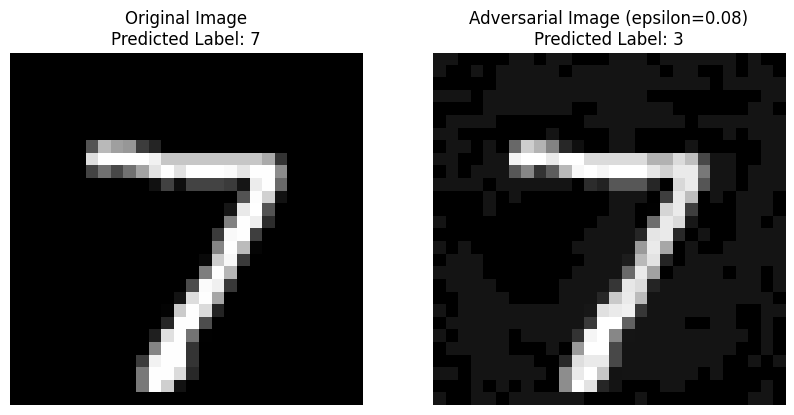

Original and adversarial images displayed with their predicted labels.


In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(original_image_reshaped, cmap='gray')
plt.title(f"Original Image\nPredicted Label: {original_predicted_label}")
plt.axis('off')

# Plot adversarial image
plt.subplot(1, 2, 2)
plt.imshow(adversarial_image_reshaped, cmap='gray')
plt.title(f"Adversarial Image (epsilon={epsilon})\nPredicted Label: {adversarial_predicted_label}")
plt.axis('off')

plt.show()

print("Original and adversarial images displayed with their predicted labels.")